# EasyVisa Project
***Marks: 60***

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

### Let us start by importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [2]:
sns.set_style("darkgrid")

<IPython.core.display.Javascript object>

## Import Dataset

In [3]:
visa = pd.read_csv("EasyVisa.csv")  ## read the data

<IPython.core.display.Javascript object>

In [4]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [5]:
data.head()  ## top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
data.tail()  ## last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [7]:
data.shape  ## dimensions of the data

(25480, 12)

<IPython.core.display.Javascript object>

**Observations**
- The dataset has a total of 25480 observations.
- There a total of 12 features.

### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

**Observations**
- A total of 12 features/columns of three different data types.
    - float64: 1
    - int64: 2
    - object: 9

In [9]:
# checking for duplicate values
data.duplicated().value_counts()  ## to check duplicate entries in the data

False    25480
dtype: int64

<IPython.core.display.Javascript object>

**Observations**
- The dataset has no duplicate values.

### Fixing the data types

In [10]:
cols = data.select_dtypes(["object"])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [11]:
for i in cols.columns:
    data[i] = data[i].astype("category")

<IPython.core.display.Javascript object>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [13]:
data.describe(
    include="all"
)  ##  Complete the code to print the statistical summary of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations**
- Top continent is Asia with a frequency of 16861
- Top education of employee is a bachelor's with a frequency of 10234

**Fixing the negative values in number of employees columns**

In [14]:
data.loc[
    data["no_of_employees"] < 0
].shape  ## check negative values in the employee column

(33, 12)

<IPython.core.display.Javascript object>

**Observations**
- A total of 33 observations have negative values in the employee column

In [15]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(
    data["no_of_employees"]
)  ## convert the values to a positive number

<IPython.core.display.Javascript object>

In [16]:
data.loc[
    data["no_of_employees"] < 0
].shape  ## check again for negative values in the employee column

(0, 12)

<IPython.core.display.Javascript object>

**Observations**
- No more negative values in the employee column

**Let's check the count of each unique category in each of the categorical variables.** 

In [17]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

<IPython.core.display.Javascript object>

In [18]:
# checking the number of unique values
data["case_id"].nunique()  ## check unique values in the mentioned column

25480

<IPython.core.display.Javascript object>

In [19]:
data.drop("case_id", axis=1, inplace=True)  ## drop 'case_id' column from the data

<IPython.core.display.Javascript object>

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


<IPython.core.display.Javascript object>

### Univariate Analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on number of employees

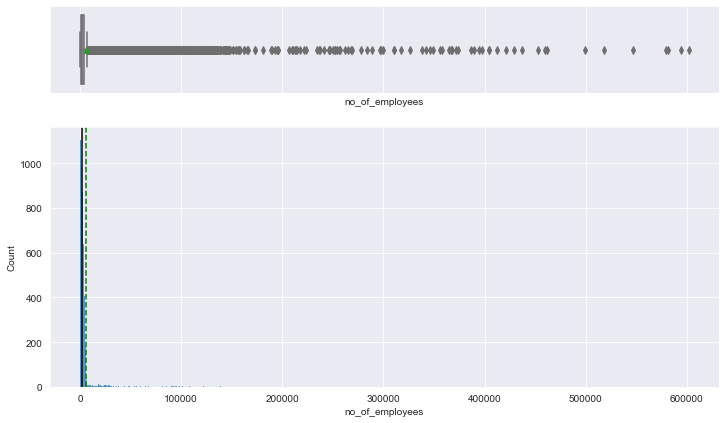

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "no_of_employees")

In [46]:
data["no_of_employees"].describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- The number of employees shows a right-skewed distribution
- Avg. number of employees is 5667
    - Min: 11
    - 25%: 1022
    - 50%: 2109
    - 75%: 3504
    - Max: 602069
- Numerous outliers are found above the upper whisker

### Observations on prevailing wage

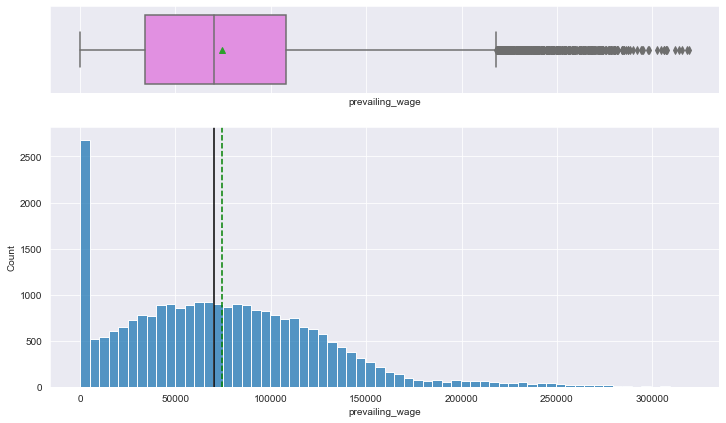

<IPython.core.display.Javascript object>

In [53]:
histogram_boxplot(data, "prevailing_wage")

In [51]:
data.loc[data["prevailing_wage"] > 100]["prevailing_wage"].describe()

count     25303.000000
mean      74976.299321
std       52631.153631
min         100.010000
25%       34855.210000
50%       70828.140000
75%      108006.840000
max      319210.270000
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Prevailing wage shows a right-skewed distribution
- Avg. prevailing wage is 74976
    - Min: 100
    - 25%: 34855
    - 50%: 70828
    - 75%: 108006
    - Max: 319210
- Numerous outliers are found above the upper whisker

In [39]:
# checking the observations which have less than 100 prevailing wage
data.loc[data["prevailing_wage"] < 100]  ## rows with less than 100 prevailing wage

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


<IPython.core.display.Javascript object>

In [45]:
data.loc[
    data["prevailing_wage"] < 100, "unit_of_wage"
].count()  ## the count of the values in the mentioned column

176

<IPython.core.display.Javascript object>

**Observations**
- A total of 176 observations have a prevailing wage lower than 100
- The unit of wage for all these 176 observations are hourly

### Observations on continent

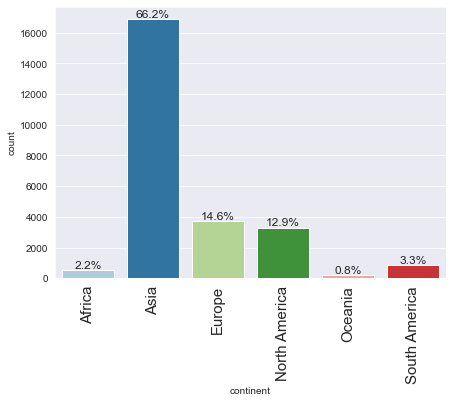

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(data, "continent", perc=True) ## labeled_barplot for continent

**Observations**
- The majority (66.2%) of visa applicants represent the continent of Asia, roughly two-thirds of the dataset
- Followed by:
    - Europe (14.6%)
    - North America (12.9%)
    - South America (3.3%)
    - Africa (2.2%)
    - Oceania (0.8%)

### Observations on education of employee

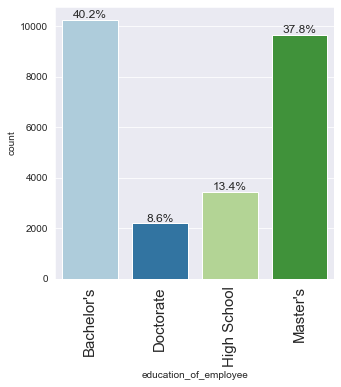

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(
    data, "education_of_employee", perc=True
)  ## labeled_barplot for education of employee

**Observations**
- The majority (40.2%) of visa applicants hold a bachelor's degree
- Followed by:
    - Master's (37.8%)
    - High School (13.4%)
    - Doctorate (8.6%)

### Observations on job experience

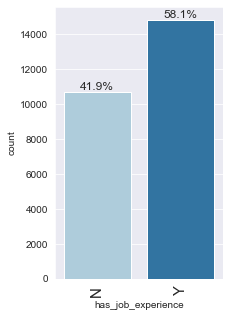

<IPython.core.display.Javascript object>

In [238]:
labeled_barplot(
    data, "has_job_experience", perc=True
)  ## labeled_barplot for job experience

In [58]:
(14802) / (14802 + 10678)

0.5809262166405024

<IPython.core.display.Javascript object>

**Observations**
- 58% of visa applicants have job experience
- Whereas, 42% have no job experience

### Observations on job training

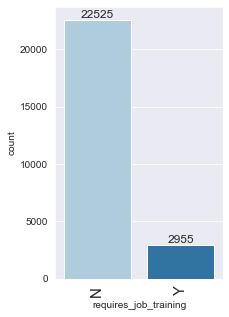

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(data, "requires_job_training")  ## labeled_barplot for job training

In [60]:
22525 / (22525 + 2955)

0.8840266875981162

<IPython.core.display.Javascript object>

**Observations**
- 88% of visa applicants do not require job training
- However, 12% do require job training

### Observations on region of employment

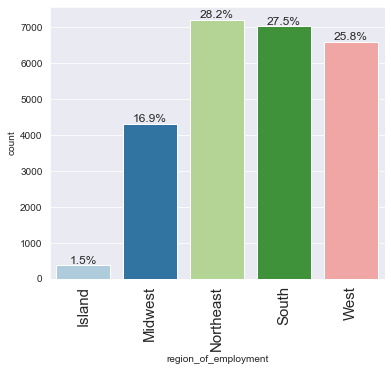

<IPython.core.display.Javascript object>

In [235]:
labeled_barplot(
    data, "region_of_employment", perc=True
)  ## labeled_barplot for region of employment

**Observations**
- The Northeast region of employment makes up the majority, 28%, of visa applicants
- Followed by:
    - South, 28%
    - West, 26%
    - Midwest, 17%
    - Island, 1%

### Observations on unit of wage

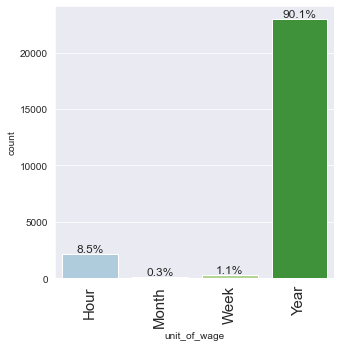

<IPython.core.display.Javascript object>

In [236]:
labeled_barplot(data, "unit_of_wage", perc=True)  ## labeled_barplot for unit of wage

**Observations**
- The majority, 90%, of all visa applicants show a yearly unit wage
- Followed by:
    - Hourly, 8%
    - Weekly, 1%
    - Monthly, 0.3%

### Observations on case status

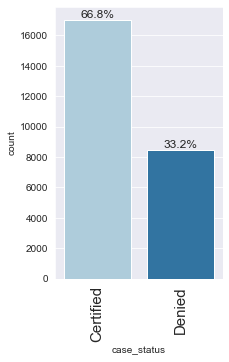

<IPython.core.display.Javascript object>

In [237]:
labeled_barplot(data, "case_status", perc=True)  ## labeled_barplot for case status

**Observations**
- 67% roughly two-thirds of all visa applicants are certified
- Whereas, 33% are denied

### Bivariate Analysis

In [84]:
data.apply(lambda x: pd.factorize(x)[0]).corr(method="pearson", min_periods=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
continent,1.000000,0.080010,-0.004847,0.079466,0.006379,0.030531,-0.123963,0.005552,-0.018712,-0.064755,0.047597
education_of_employee,0.080010,1.000000,-0.013553,0.053588,-0.011864,-0.008589,-0.102725,0.007039,0.023140,-0.084936,0.155641
has_job_experience,-0.004847,-0.013553,1.000000,-0.112195,0.021058,-0.012748,-0.025303,-0.004126,0.125951,-0.041964,0.192162
requires_job_training,0.079466,0.053588,-0.112195,1.000000,-0.015831,0.010701,-0.051999,-0.004237,0.052991,-0.104590,0.008423
no_of_employees,0.006379,-0.011864,0.021058,-0.015831,1.000000,0.004795,-0.022221,0.316610,0.005511,0.002907,0.006605
yr_of_estab,0.030531,-0.008589,-0.012748,0.010701,0.004795,1.000000,-0.012210,0.010586,-0.022260,0.005352,-0.015221
region_of_employment,-0.123963,-0.102725,-0.025303,-0.051999,-0.022221,-0.012210,1.000000,0.006167,0.022883,0.048773,0.092277
prevailing_wage,0.005552,0.007039,-0.004126,-0.004237,0.316610,0.010586,0.006167,1.000000,-0.012097,-0.006876,0.003883
unit_of_wage,-0.018712,0.023140,0.125951,0.052991,0.005511,-0.022260,0.022883,-0.012097,1.000000,0.071738,0.172995
full_time_position,-0.064755,-0.084936,-0.041964,-0.104590,0.002907,0.005352,0.048773,-0.006876,0.071738,1.000000,0.012711


<IPython.core.display.Javascript object>

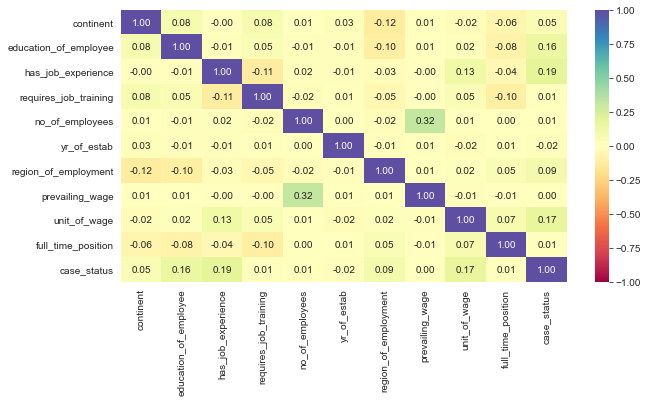

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    data.apply(lambda x: pd.factorize(x)[0]).corr(method="pearson", min_periods=1),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)  ## the correlation between the variables
plt.show()

**Observations**
- Dependent Variable: case_status
- Highly positively correlated IVs
    - education_of_employee
    - has_job_experience
    - region_of_employment
    - unit_of_wage

**Creating functions that will help us with further analysis.**

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


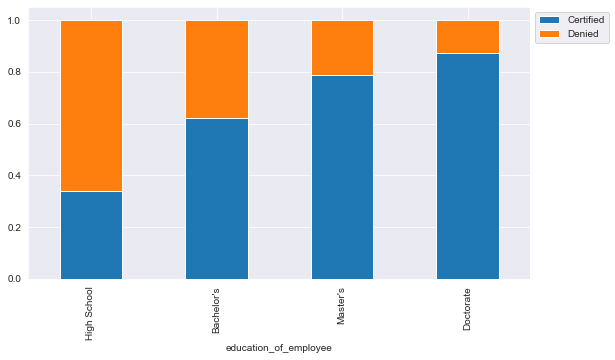

<IPython.core.display.Javascript object>

In [88]:
stacked_barplot(data, "education_of_employee", "case_status")

**Observations**
- It is clear that for one unit increase in education level the chances of the VISA applicant getting certified increase too
- VISA applicants with a doctorate hold the highest certification rate at about 87%
- Followed by:
    - Master's, 79%
    - Bachelor's, 62%
    - High School, 36%

**Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further**

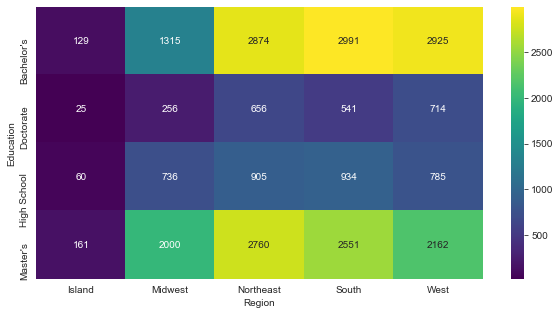

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)  ## to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Observations**
- Across all regions both education levels bachelor's and master's hold the highest populations
- For the Northeast, South, and West regions the education levels are as follow
    - Bachelor's
    - Master's
    - High School
    - Doctorate
- For the Midwest and Island regions the education levels are as follow
    - Master's
    - Bachelor's
    - High School
    - Doctorate

**Let's have a look at the percentage of visa certifications across each region**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


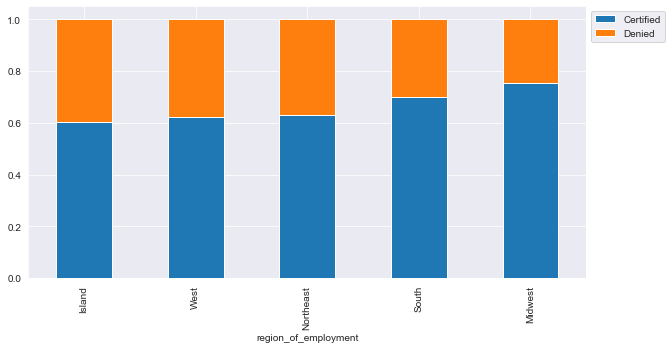

<IPython.core.display.Javascript object>

In [95]:
stacked_barplot(
    data, "region_of_employment", "case_status"
)  ## stacked barplot for region of employment and case status

**Observations**
- The Midwest region holds the highest VISA application certification rate at about 77%
- Followed by:
    - South, 70%
    - Northeast, 62%
    - West, 61%
    - Island, 60%

**Lets' similarly check for the continents and find out how the visa status vary across different continents.**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


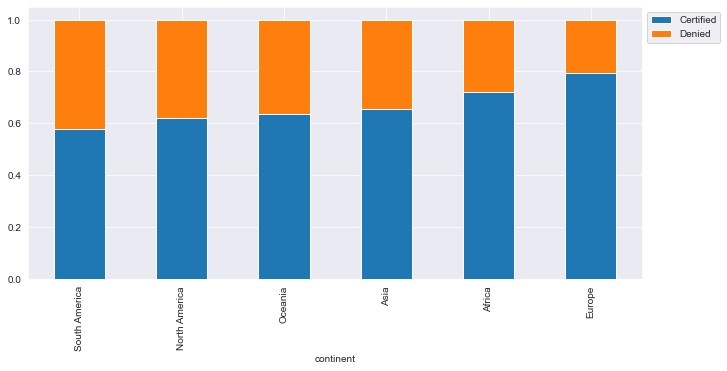

<IPython.core.display.Javascript object>

In [96]:
stacked_barplot(
    data, "continent", "case_status"
)  ## stacked barplot for continent and case status

**Observations**
- Certified VISA applicants are primarily from Europe with a certification rate of about 80%
- Followed by:
    - Africa, 76%
    - Asia, 63%
    - Oceania, 62%
    - North America, 61%
    - South America, 59%

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification** 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


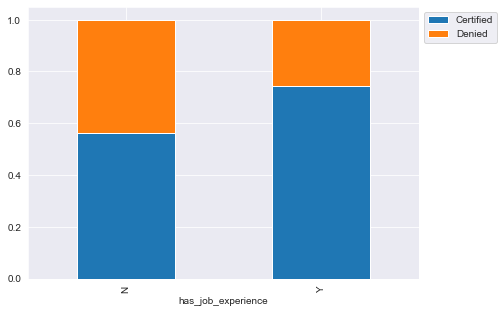

<IPython.core.display.Javascript object>

In [97]:
stacked_barplot(
    data, "has_job_experience", "case_status"
)  ## stacked barplot for job experience and case status

**Observations**
- VISA applicants who do have previous work experience show a higher certification rate of about 77%
- VISA applicants with no previous work experience have a certification rate of about 58%
- VISA candidates with previous work experience almost show a 20% increase in getting certified/approved

**Do the employees who have prior work experience require any job training?**

requires_job_training      N     Y    All
has_job_experience                       
Y                      13537  1265  14802
All                    13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


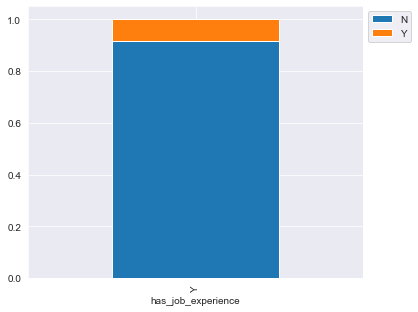

<IPython.core.display.Javascript object>

In [99]:
stacked_barplot(
    data.loc[data["has_job_experience"] == "Y"],
    "has_job_experience",
    "requires_job_training",
)  ## stacked barplot for job experience and requires_job_training

**Observations**
- The majority, 96%, of employees with prior work experience do not need job training
- No job training indicates less costs associated with the employee which is always a plus for a company

**The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage**

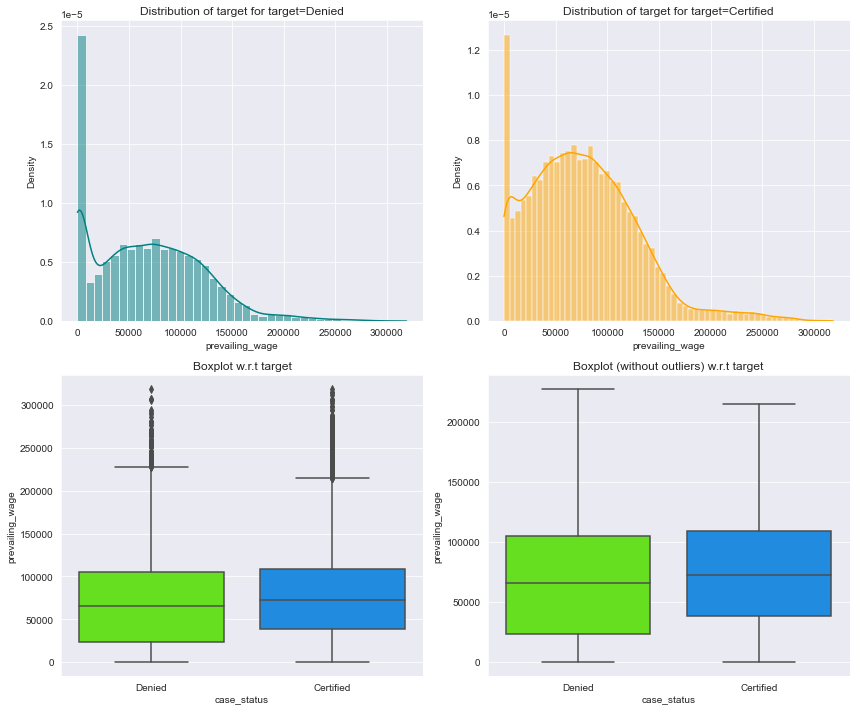

<IPython.core.display.Javascript object>

In [100]:
distribution_plot_wrt_target(
    data, "prevailing_wage", "case_status"
)  ## distribution of prevailing wage and case status

In [248]:
data.groupby(["case_status"])["prevailing_wage"].describe()

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,17018.0,77293.619243,52042.715576,2.1367,38375.330,72486.27,108879.1075,318446.05
Denied,8462.0,68748.681580,53890.166031,2.9561,23497.295,65431.46,105097.6400,319210.27


<IPython.core.display.Javascript object>

**Observations**
- The boxplots for both case status, denied and certified, are just about the same
- This could indicate that there is no correlation between prevailing wage and case status

**Checking if the prevailing wage is similar across all the regions of the US**

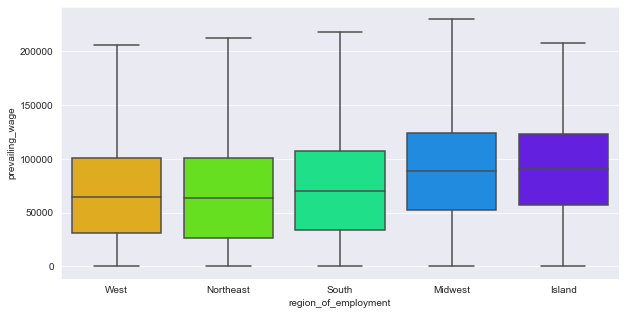

<IPython.core.display.Javascript object>

In [114]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="region_of_employment",
    y="prevailing_wage",
    palette="gist_rainbow",
    showfliers=False,
)  ## boxplot for region of employment and prevailing wage
plt.show()

**Observations**
- On average, both the West and Northeast regions have a similar previaling wage
- The South region has a slightly higher previaling wage on average 
- Lastly, the Midwest and Island regions have the highest prevailing wages on average

**The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


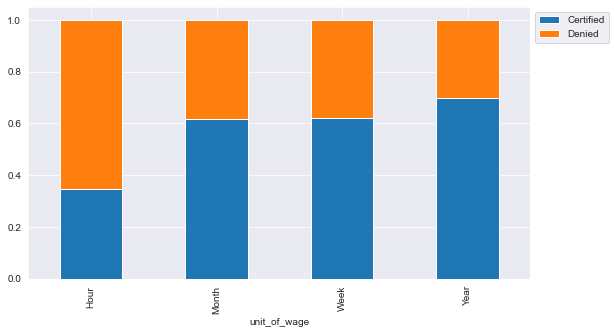

<IPython.core.display.Javascript object>

In [115]:
stacked_barplot(
    data, "unit_of_wage", "case_status"
)  ## stacked barplot for unit of wage and case status

**Observations**
- A yearly unit of wage shows the highest likelihood of VISA application certification at about 70%
- Followed by both a monthly and weekly unite of wage at about 61%
- The unit of wage with the lowest likelihood of VISA application certification is hourly at about 37%

In [39]:
data.loc[
    (data["education_of_employee"] != "High School")
    & (data["has_job_experience"] == "N")
    & (data["prevailing_wage"] < 1000)
].describe(include="all")

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,1163,1163,1163,1163,1163.000000,1163.000000,1163,1163.000000,1163,1163,1163
unique,6,3,1,2,NaN,NaN,5,NaN,2,2,2
top,Asia,Bachelor's,N,N,NaN,NaN,Northeast,NaN,Hour,Y,Denied
freq,707,619,1163,1125,NaN,NaN,492,NaN,1131,1151,796
mean,NaN,NaN,NaN,NaN,4657.392089,1974.411006,NaN,413.855941,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,16495.003712,45.913613,NaN,278.765422,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,14.000000,1807.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,923.500000,1969.000000,NaN,144.950000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1859.000000,1993.000000,NaN,371.825600,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3037.500000,2003.000000,NaN,646.435050,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### Outlier Check

- Let's check for outliers in the data.

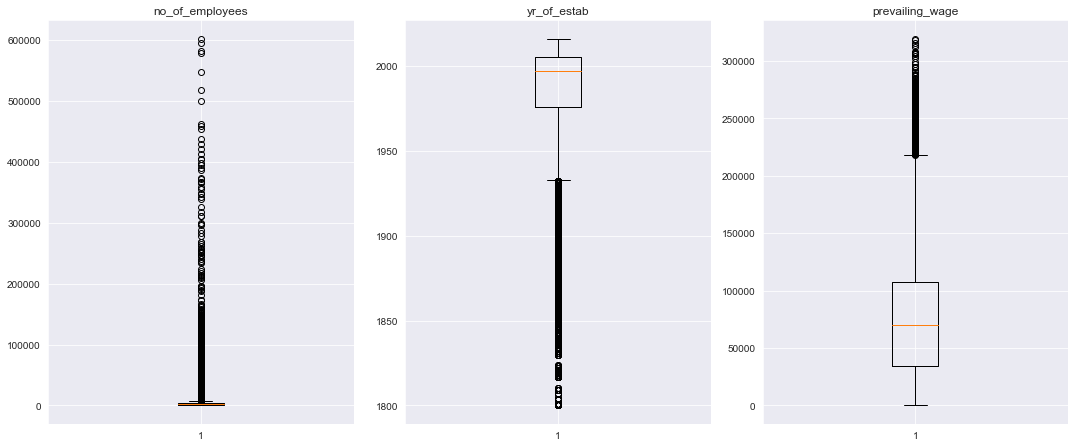

<IPython.core.display.Javascript object>

In [120]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)  ## boxplots for all the numeric columns
plt.show()

### Treating Outliers

In [121]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [250]:
# numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col = ["prevailing_wage"]
df = treat_outliers_all(data, numerical_col)

<IPython.core.display.Javascript object>

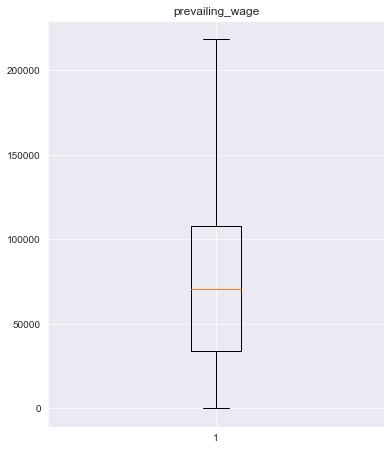

<IPython.core.display.Javascript object>

In [124]:
### let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [153]:
X = data.drop(
    ["case_status"], axis=1
)  ## Complete the code to drop case status from the data
Y = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)


X = pd.get_dummies(X, drop_first=True)  ## Complete the code to create dummies

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)  ## Complete the code to split the data into train and test in the ratio 70:30

<IPython.core.display.Javascript object>

In [154]:
Y.value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

In [155]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [128]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [129]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision Tree Model

In [156]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.17, 1: 0.83}, random_state=1
)  ## Complete the code to define decision tree classifier with random state = 1
model.fit(
    X_train, y_train
)  ## Complete the code to fit decision tree classifier on the train data

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

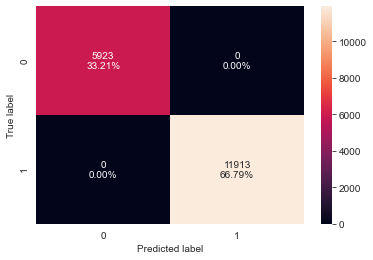

<IPython.core.display.Javascript object>

In [157]:
confusion_matrix_sklearn(
    model, X_train, y_train
)  ## Complete the code to create confusion matrix for train data

In [158]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)  ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

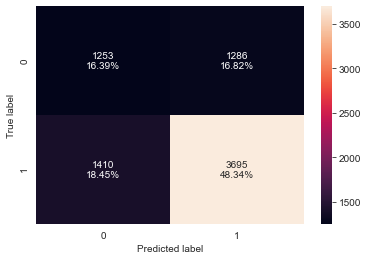

<IPython.core.display.Javascript object>

In [159]:
confusion_matrix_sklearn(
    model, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [160]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)  ## Complete the code to check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.647305,0.7238,0.741819,0.732699


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Decision Tree

In [161]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    dtree_estimator, parameters, scoring=scorer
)  ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

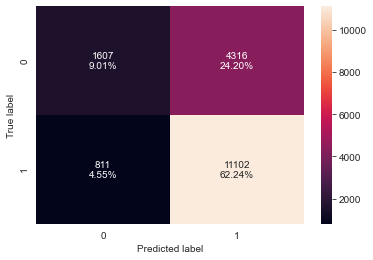

<IPython.core.display.Javascript object>

In [162]:
confusion_matrix_sklearn(
    dtree_estimator, X_train, y_train
)  ## Complete the code to create confusion matrix for train data on tuned estimator

In [164]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)  ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


<IPython.core.display.Javascript object>

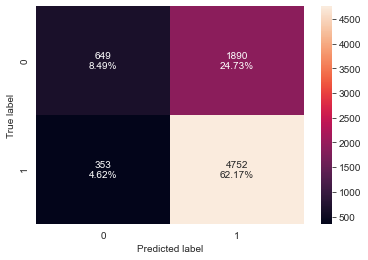

<IPython.core.display.Javascript object>

In [165]:
confusion_matrix_sklearn(
    dtree_estimator, X_test, y_test
)  ## Complete the code to create confusion matrix for test data on tuned estimator

In [166]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)  ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


<IPython.core.display.Javascript object>

### Bagging Classifier

In [167]:
bagging = BaggingClassifier(
    random_state=1
)  ## Complete the code to define bagging classifier with random state = 1
bagging.fit(
    X_train, y_train
)  ## Complete the code to fit bagging classifier on the train data

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

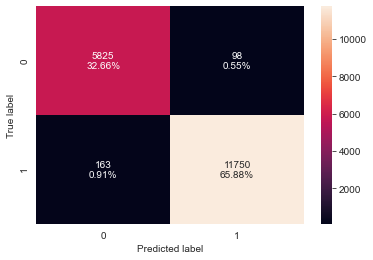

<IPython.core.display.Javascript object>

In [168]:
confusion_matrix_sklearn(
    bagging, X_train, y_train
)  ## Complete the code to create confusion matrix for train data

In [169]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)  ## Complete the code to check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985367,0.986317,0.991729,0.989016


<IPython.core.display.Javascript object>

#### Checking model performance on test set

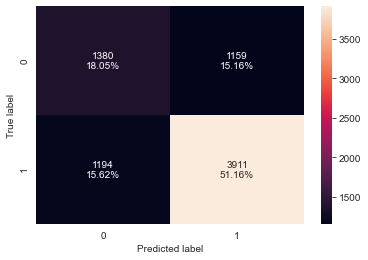

<IPython.core.display.Javascript object>

In [170]:
confusion_matrix_sklearn(
    bagging, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [171]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)  ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.692177,0.766112,0.7714,0.768747


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Bagging Classifier

In [173]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=parameters,
    scoring="recall",
    cv=5,
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

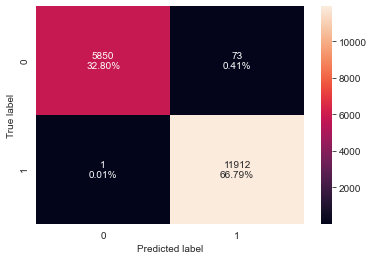

<IPython.core.display.Javascript object>

In [174]:
confusion_matrix_sklearn(
    bagging_estimator_tuned, X_train, y_train
)  ## Complete the code to create confusion matrix for train data on tuned estimator

In [175]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)  ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.995851,0.999916,0.993909,0.996904


<IPython.core.display.Javascript object>

#### Checking model performance on test set

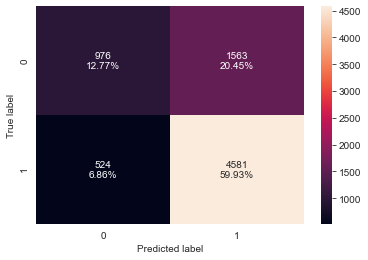

<IPython.core.display.Javascript object>

In [176]:
confusion_matrix_sklearn(
    bagging_estimator_tuned, X_test, y_test
)  ## Complete the code to create confusion matrix for test data on tuned estimator

In [177]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)  ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.726975,0.897356,0.745605,0.814472


<IPython.core.display.Javascript object>

### Random Forest

In [178]:
# Fitting the model
rf_estimator = RandomForestClassifier(
    random_state=1
)  ## Complete the code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(
    X_train, y_train
)  ## Complete the code to fit random forest on the train data

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

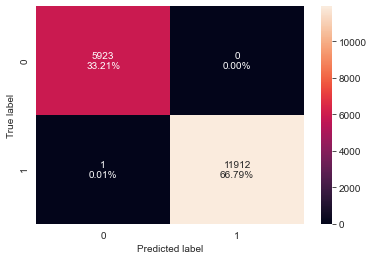

<IPython.core.display.Javascript object>

In [180]:
confusion_matrix_sklearn(
    rf_estimator, X_train, y_train
)  ## Complete the code to create confusion matrix for train data

In [181]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)  ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


<IPython.core.display.Javascript object>

#### Checking model performance on test set

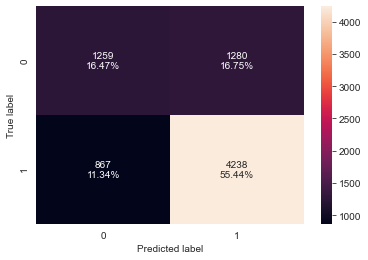

<IPython.core.display.Javascript object>

In [182]:
confusion_matrix_sklearn(
    rf_estimator, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [183]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)  ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.719126,0.830167,0.768032,0.797891


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Random Forest

In [184]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    rf_estimator, parameters, scoring="recall", cv=5, n_jobs=-1
)  ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=3,
                       n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

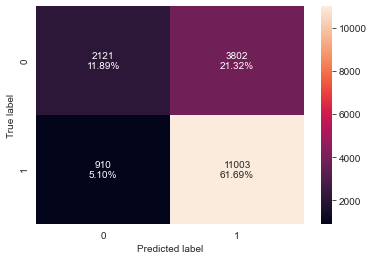

<IPython.core.display.Javascript object>

In [185]:
confusion_matrix_sklearn(
    rf_tuned, X_train, y_train
)  ## Complete the code to create confusion matrix for train data on tuned estimator

In [186]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)  ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.735815,0.923613,0.743195,0.823639


<IPython.core.display.Javascript object>

#### Checking model performance on test set

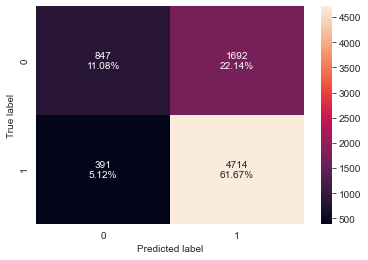

<IPython.core.display.Javascript object>

In [187]:
confusion_matrix_sklearn(
    rf_tuned, X_test, y_test
)  ## Complete the code to create confusion matrix for test data on tuned estimator

In [188]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)  ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727499,0.923408,0.735873,0.819043


<IPython.core.display.Javascript object>

### AdaBoost Classifier

In [189]:
ab_classifier = AdaBoostClassifier(
    random_state=1
)  ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.fit(
    X_train, y_train
)  ## Complete the code to fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

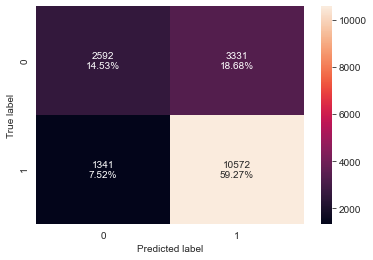

<IPython.core.display.Javascript object>

In [190]:
confusion_matrix_sklearn(
    ab_classifier, X_train, y_train
)  ## Complete the code to create confusion matrix for train data

In [191]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)  ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738058,0.887434,0.760411,0.819027


<IPython.core.display.Javascript object>

#### Checking model performance on test set

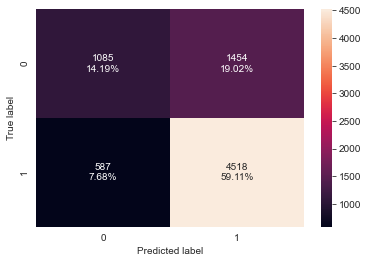

<IPython.core.display.Javascript object>

In [192]:
confusion_matrix_sklearn(
    ab_classifier, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [193]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)  ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732993,0.885015,0.75653,0.815744


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - AdaBoost Classifier

In [194]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    abc_tuned, parameters, scoring=acc_scorer, cv=5
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

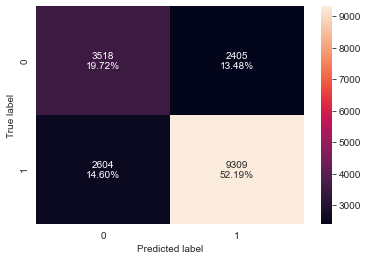

<IPython.core.display.Javascript object>

In [195]:
confusion_matrix_sklearn(
    abc_tuned, X_train, y_train
)  ## Complete the code to create confusion matrix for train data on tuned estimator

In [196]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)  ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719163,0.781415,0.79469,0.787997


<IPython.core.display.Javascript object>

#### Checking model performance on test set

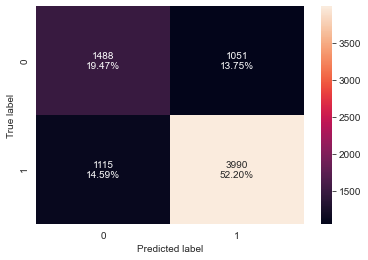

<IPython.core.display.Javascript object>

In [197]:
confusion_matrix_sklearn(
    abc_tuned, X_test, y_test
)  ## Complete the code to create confusion matrix for test data on tuned estimator

In [198]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)  ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.716641,0.781587,0.79151,0.786517


<IPython.core.display.Javascript object>

### Gradient Boosting Classifier

In [199]:
gb_classifier = GradientBoostingClassifier(
    random_state=1
)  ## Complete the code to define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(
    X_train, y_train
)  ## Complete the code to fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

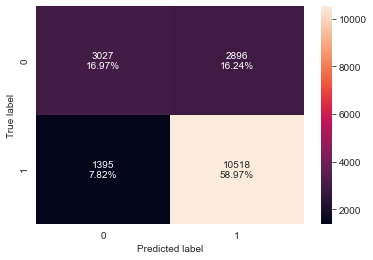

<IPython.core.display.Javascript object>

In [200]:
confusion_matrix_sklearn(
    gb_classifier, X_train, y_train
)  ## Complete the code to create confusion matrix for train data

In [201]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)  ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759419,0.882901,0.784106,0.830576


<IPython.core.display.Javascript object>

#### Checking model performance on test set

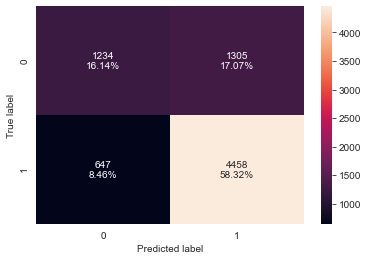

<IPython.core.display.Javascript object>

In [202]:
confusion_matrix_sklearn(
    gb_classifier, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [203]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)  ## Complete the code to check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.873262,0.773555,0.82039


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - Gradient Boosting Classifier

In [204]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250, 300],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    gbc_tuned, parameters, scoring=acc_scorer, cv=5
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=1, n_estimators=200,
                           random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

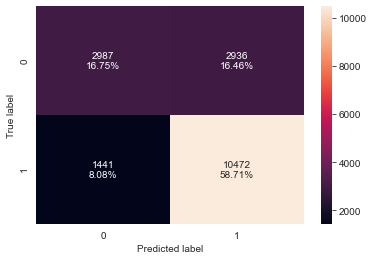

<IPython.core.display.Javascript object>

In [205]:
confusion_matrix_sklearn(
    gbc_tuned, X_train, y_train
)  ## Complete the code to create confusion matrix for train data on tuned estimator

In [206]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)  ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754597,0.87904,0.781026,0.82714


<IPython.core.display.Javascript object>

#### Checking model performance on test set

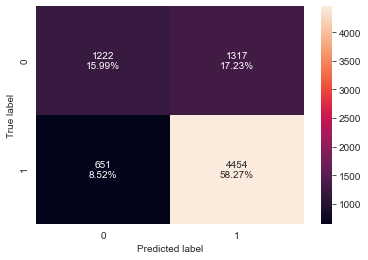

<IPython.core.display.Javascript object>

In [207]:
confusion_matrix_sklearn(
    gbc_tuned, X_test, y_test
)  ## Complete the code to create confusion matrix for test data on tuned estimator

In [208]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)  ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742543,0.872478,0.77179,0.819051


<IPython.core.display.Javascript object>

### Note - You can choose not to build XGBoost if you have any installation issue

### XGBoost Classifier

In [209]:
xgb_classifier = XGBClassifier(
    random_state=1, eval_metric="logloss"
)  ## Complete the code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(
    X_train, y_train
)  ## Complete the code to fit XGBoost Classifier on the train data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

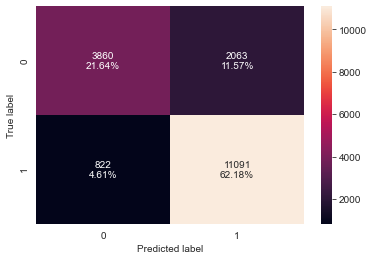

<IPython.core.display.Javascript object>

In [210]:
confusion_matrix_sklearn(
    xgb_classifier, X_train, y_train
)  ## Complete the code to create confusion matrix for train data

In [211]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)  ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838248,0.931,0.843166,0.884908


<IPython.core.display.Javascript object>

#### Checking model performance on test set

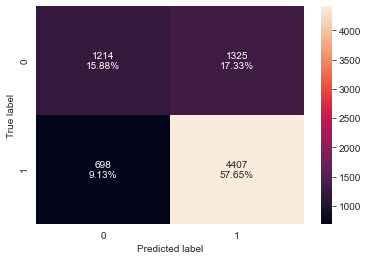

<IPython.core.display.Javascript object>

In [212]:
confusion_matrix_sklearn(
    xgb_classifier, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [213]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)  ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.735348,0.863271,0.768842,0.813325


<IPython.core.display.Javascript object>

### Hyperparameter Tuning - XGBoost Classifier

In [214]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
    "gamma": [1, 3, 5],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "colsample_bylevel": [0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    xgb_tuned, parameters, scoring=acc_scorer, cv=5
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

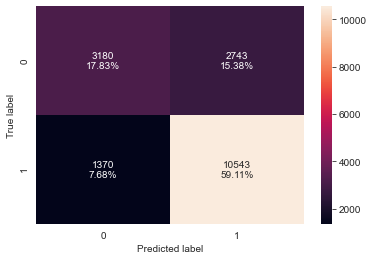

<IPython.core.display.Javascript object>

In [215]:
confusion_matrix_sklearn(
    xgb_tuned, X_train, y_train
)  ## Complete the code to create confusion matrix for train data on tuned estimator

In [216]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)  ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769399,0.885,0.793542,0.836779


<IPython.core.display.Javascript object>

#### Checking model performance on test set

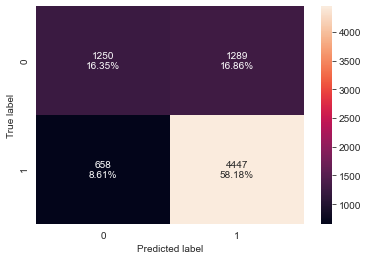

<IPython.core.display.Javascript object>

In [217]:
confusion_matrix_sklearn(
    xgb_tuned, X_test, y_test
)  ## Complete the code to create confusion matrix for test data on tuned estimator

In [218]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)  ## Complete the code to check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74529,0.871107,0.775279,0.820404


<IPython.core.display.Javascript object>

### Stacking Classifier

In [219]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)  ## Complete the code to define Stacking Classifier

stacking_classifier.fit(
    X_train, y_train
)  ## Complete the code to fit Stacking Classifier on the train data

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.2,
                                                           max_features=1,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=3,
                                                       n_estim...
                         

<IPython.core.display.Javascript object>

#### Checking model performance on training set

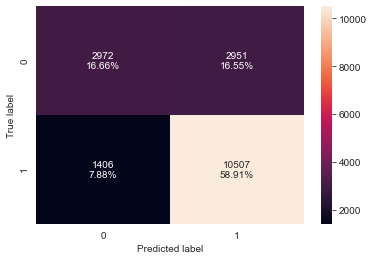

<IPython.core.display.Javascript object>

In [220]:
confusion_matrix_sklearn(
    stacking_classifier, X_train, y_train
)  ## Complete the code to create confusion matrix for train data

In [221]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)  ## Complete the code to check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.755719,0.881978,0.780725,0.828268


<IPython.core.display.Javascript object>

#### Checking model performance on test set

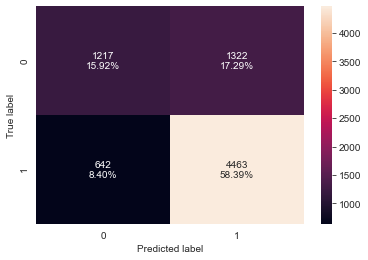

<IPython.core.display.Javascript object>

In [222]:
confusion_matrix_sklearn(
    stacking_classifier, X_test, y_test
)  ## Complete the code to create confusion matrix for test data

In [223]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)  ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743066,0.874241,0.771478,0.819651


<IPython.core.display.Javascript object>

### Conclusion

**Comparing all models**

In [224]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_estimator_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.712548,0.712548,0.985367,0.995851,0.999944,0.735815,0.738058,0.719163,0.759419,0.754597,0.838248,0.769399,0.755719
Recall,0.931923,0.931923,0.986317,0.999916,0.999916,0.923613,0.887434,0.781415,0.882901,0.879040,0.931000,0.885000,0.881978
Precision,0.720067,0.720067,0.991729,0.993909,1.000000,0.743195,0.760411,0.794690,0.784106,0.781026,0.843166,0.793542,0.780725
F1,0.812411,0.812411,0.989016,0.996904,0.999958,0.823639,0.819027,0.787997,0.830576,0.827140,0.884908,0.836779,0.828268


<IPython.core.display.Javascript object>

In [225]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_estimator_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df  ## Complete the code to check performance for test data

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.706567,0.706567,0.692177,0.726975,0.719126,0.727499,0.732993,0.716641,0.744636,0.742543,0.735348,0.745290,0.743066
Recall,0.930852,0.930852,0.766112,0.897356,0.830167,0.923408,0.885015,0.781587,0.873262,0.872478,0.863271,0.871107,0.874241
Precision,0.715447,0.715447,0.771400,0.745605,0.768032,0.735873,0.756530,0.791510,0.773555,0.771790,0.768842,0.775279,0.771478
F1,0.809058,0.809058,0.768747,0.814472,0.797891,0.819043,0.815744,0.786517,0.820390,0.819051,0.813325,0.820404,0.819651


<IPython.core.display.Javascript object>

### Important features of the final model

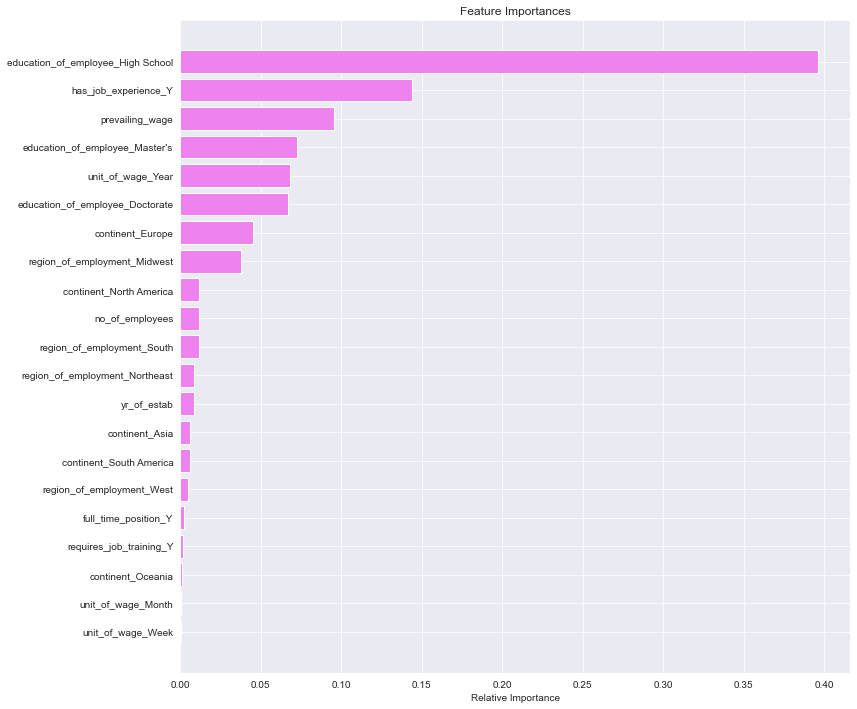

<IPython.core.display.Javascript object>

In [226]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
- An employee with a high school education is the most important feature for classification followed by having previous work experience, prevailing wage, master's, yearly wage, and a doctorate

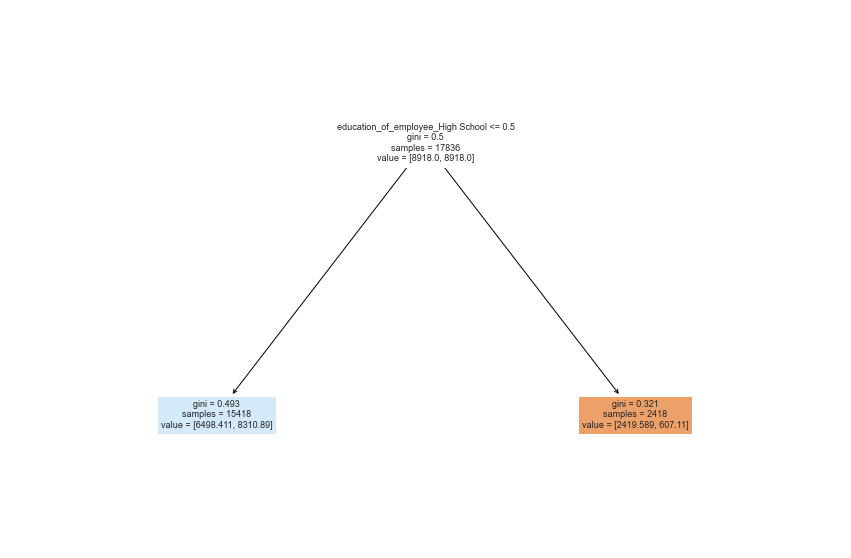

<IPython.core.display.Javascript object>

In [254]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    dtree_estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [344]:
best_model = DecisionTreeClassifier(
    class_weight="balanced",
    max_depth=10,
    max_leaf_nodes=8,
    min_impurity_decrease=0.0001,
    min_samples_leaf=3,
    random_state=1,
)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=8,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

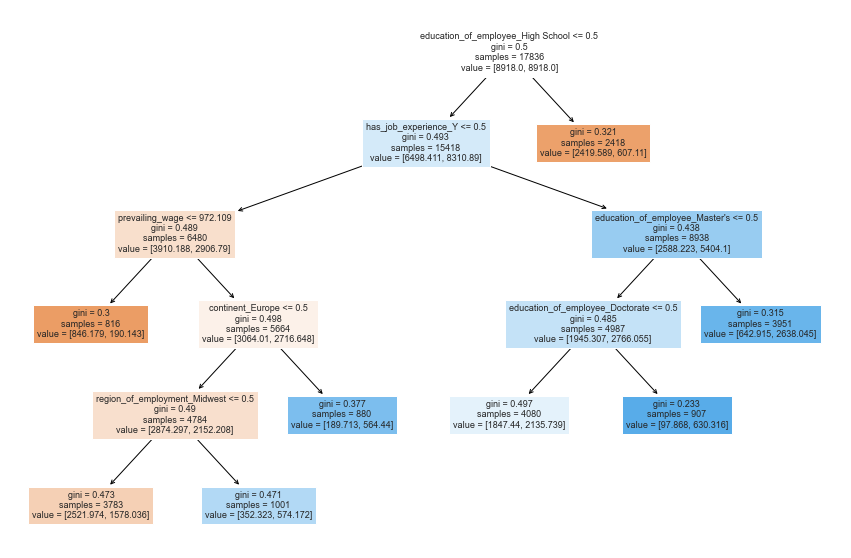

<IPython.core.display.Javascript object>

In [345]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

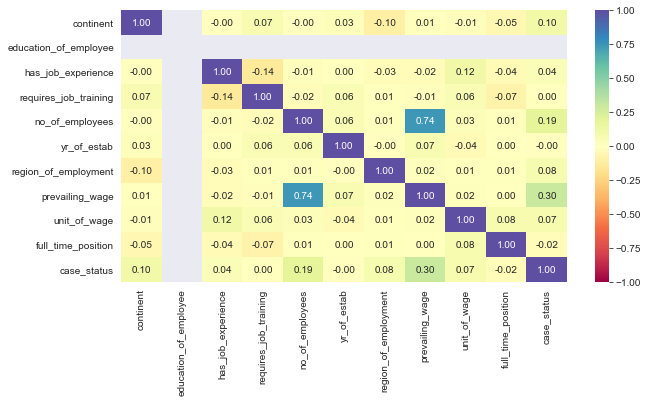

<IPython.core.display.Javascript object>

In [338]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    data.loc[data["education_of_employee"] == "High School"]
    .apply(lambda x: pd.factorize(x)[0])
    .corr(method="pearson", min_periods=1),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)  ## the correlation between the variables
plt.show()

In [343]:
data.loc[data["education_of_employee"] == "High School"].groupby(
    ["case_status"]
).describe(include="all")

continent                                                        \
                count unique   top  freq mean  std  min  25%  50%  75%  max   
case_status                                                                   
Certified        1164      6  Asia   676  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Denied           2256      6  Asia  1614  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

            education_of_employee                                           \
                            count unique          top  freq mean  std  min   
case_status                                                                  
Certified                    1164      1  High School  1164  NaN  NaN  NaN   
Denied                       2256      1  High School  2256  NaN  NaN  NaN   

                                has_job_experience                             \
             25%  50%  75%  max              count unique top  freq mean  std   
case_status                                                                     
Certified    NaN  NaN  NaN  NaN               1164      2   Y   722  NaN  NaN   
Denied       NaN  NaN  NaN  NaN               2256      2   Y  1302  NaN  NaN   

                                     requires_job_training                   \
             min  25%  50%  75%  max                 count unique top  freq   
case_status                                                                   
Certified    NaN  NaN  NaN  NaN  NaN                  1164      2   N  1016   
Denied       NaN  NaN  NaN  NaN  NaN                  2256      2   N  1974   

                                               no_of_employees             \
            mean  std  min  25%  50%  75%  max           count unique top   
case_status                                                                 
Certified    NaN  NaN  NaN  NaN  NaN  NaN  NaN          1164.0    NaN NaN   
Denied       NaN  NaN  NaN  NaN  NaN  NaN  NaN          2256.0    NaN NaN   

                                                                            \
            freq         mean           std   min     25%     50%      75%   
case_status                                                                  
Certified    NaN  4541.660653  12680.509551  16.0  957.75  2112.0  3523.25   
Denied       NaN  5184.254433  21916.980245 -25.0  922.75  2032.0  3400.00   

                      yr_of_estab                                          \
                  max       count unique top freq         mean        std   
case_status                                                                 
Certified    147088.0      1164.0    NaN NaN  NaN  1978.081615  42.887656   
Denied       517884.0      2256.0    NaN NaN  NaN  1978.518617  43.796654   

                                                    region_of_employment  \
                min     25%     50%     75%     max                count   
case_status                                                                
Certified    1804.0  1973.0  1997.0  2005.0  2015.0                 1164   
Denied       1800.0  1976.0  1997.0  2004.0  2016.0                 2256   

                                                                       \
            unique        top freq mean  std  min  25%  50%  75%  max   
case_status                                                             
Certified        5      South  355  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Denied           5  Northeast  642  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

            prevailing_wage                                              \
                      count unique top freq          mean           std   
case_status                                                               
Certified            1164.0    NaN NaN  NaN  74321.690658  53140.149923   
Denied               2256.0    NaN NaN  NaN  69521.232823  52025.426683   

                                                                      \
                 min        25%        50%         75%           

<IPython.core.display.Javascript object>

### Recommendations
**Appropriate Profile for VISA certification**
- A visa applicant with previous work experience and a higher education is more likely (80%) to get their visa certified.

- A visa applicant who has a higher education and no previous work experience but whose intended prevailing wage is greater than 970 USD and of the European continent is more likely (75%) to get their visa certified.

**Appropriate Profile for VISA denial**
- A visa applicant who has a higher education but no previous work experience and whose intended prevailing wage is less than 970 USD demonstrates a higher likelihood (82%) of being denied a visa.

- A visa applicant whose highest education level is high school demonstrates a higher likelihood (80%) of being denied a visa.

**Profiles that require further evaluation**
- Upon investigation visa applicants whose highest education level is high school are more likely to get certified if their region of employment is in the South whereas they're more likely to get denied with a Northeast region of employment.